# creation d'un model de Deep learning CNN pour le jeu de données MNIST

In [ ]:
# import librairies
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 


from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Vérification des versions et configuration
print(f"TensorFlow version: {tf.__version__}")
print(f"GPU disponible: {tf.config.list_physical_devices('GPU')}")

# Configurer la mémoire GPU pour éviter les erreurs OOM (Out of Memory)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("Mémoire GPU configurée pour une croissance dynamique")
    except RuntimeError as e:
        print(f"Erreur de configuration GPU: {e}")


tf.random.set_seed(42)
np.random.seed(42)

TensorFlow version: 2.19.0
GPU disponible: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mémoire GPU configurée pour une croissance dynamique


In [ ]:
# importation et préparation des données MNIST
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation des données
x_train = x_train.reshape((x_train.shape[0], 28, 28,)).astype('float32') / 255.0
x_test = x_test.reshape((x_test.shape[0], 28, 28,)).astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)  


In [4]:
# creation du modèle CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax', dtype='float32')  # Utilisation de 'float32' pour la couche de sortie
])


/opt/homebrew/Caskroom/miniconda/base/envs/ia-env-py3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-03 19:26:42.554922: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-07-03 19:26:42.554964: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 24.00 GB
2025-07-03 19:26:42.554973: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 8.00 GB
I0000 00:00:1751563602.555021   86068 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751563602.555075   86068 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/r

In [5]:
# compilation du modèle
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
# entrainement du modèle
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5


2025-07-03 19:27:08.671164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8509 - loss: 0.4755 - val_accuracy: 0.9716 - val_loss: 0.0997
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9773 - loss: 0.0700 - val_accuracy: 0.9805 - val_loss: 0.0734
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.9844 - loss: 0.0510 - val_accuracy: 0.9832 - val_loss: 0.0680
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9867 - loss: 0.0446 - val_accuracy: 0.9860 - val_loss: 0.0553
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.9882 - loss: 0.0398 - val_accuracy: 0.9852 - val_loss: 0.0654


In [7]:
# evaluation du modèle
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 2s - 7ms/step - accuracy: 0.9874 - loss: 0.0497
Test accuracy: 0.9874


In [8]:
# sauvegarde du modèle au format .keras
model.save('../model/mnist_cnn_model.keras')

313/313 - 2s - 7ms/step - accuracy: 0.9874 - loss: 0.0497
Test accuracy of loaded model: 0.9874
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


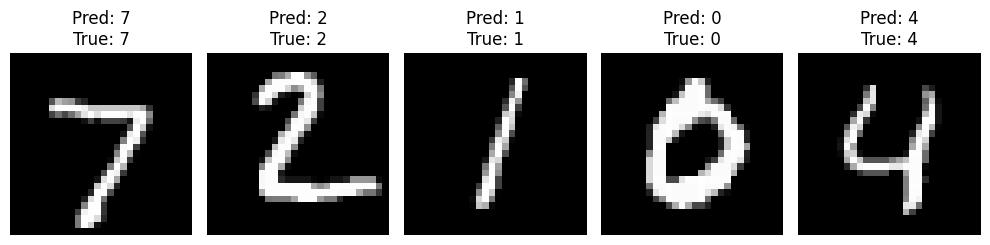

In [10]:
# test du modèle sauvegardé
loaded_model = tf.keras.models.load_model('../model/mnist_cnn_model.keras')
test_loss_loaded, test_acc_loaded = loaded_model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy of loaded model: {test_acc_loaded:.4f}")  
# visualisation de la prediction

def plot_predictions(model, x_test, y_test, num_images=5):
    predictions = model.predict(x_test[:num_images])
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(y_test[:num_images], axis=1)

    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {predicted_classes[i]}\nTrue: {true_classes[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Affichage des prédictions
plot_predictions(model, x_test, y_test, num_images=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


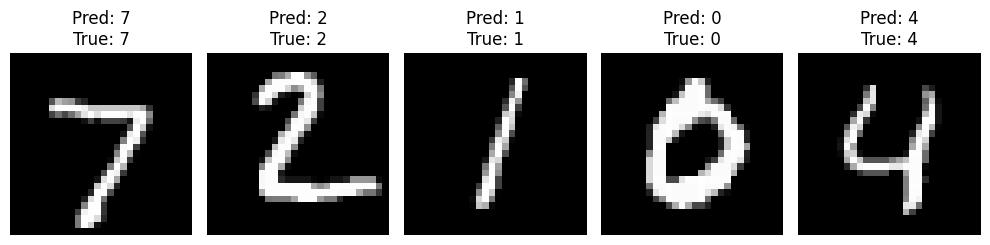

In [11]:
plot_predictions(loaded_model, x_test, y_test, num_images=5)